https://segment-anything.com/

In [28]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands
!pip install opendatasets
!pip install ultralytics

# Clean up the notebook
clean_notebook()



Notebook cleaned.


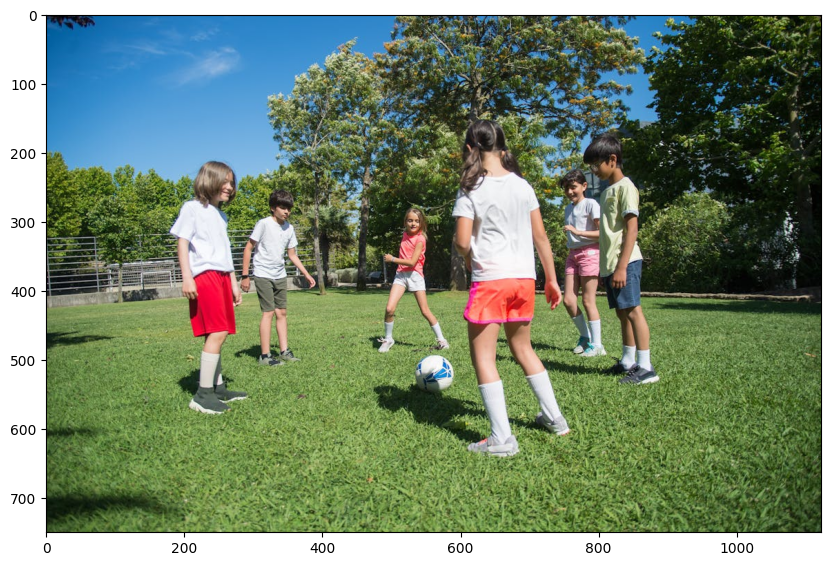

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

image_file = ".././images/football_teamplay.jpeg"
#display the image


img = Image.open(image_file)

plt.figure(figsize=(10, 8))  # Width: 12 inches, Height: 8 inches
plt.imshow(img)

# Single object : OnePoint

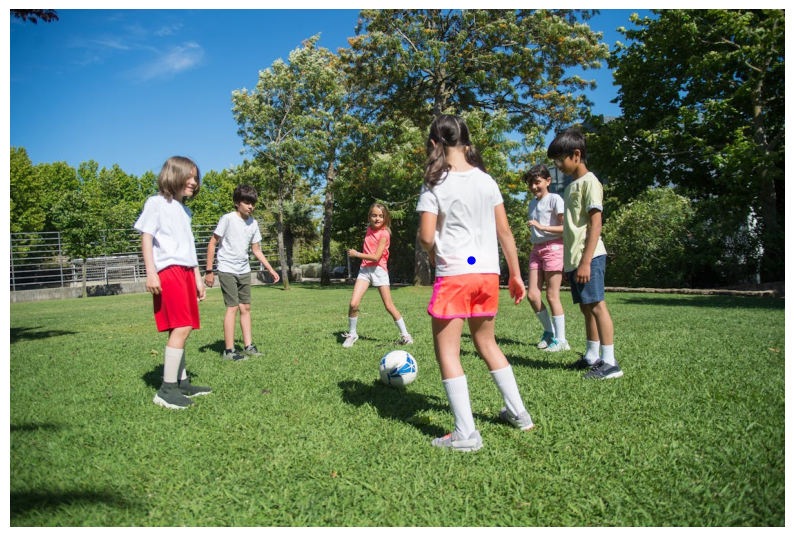


0: 1024x1024 1 0, 1409.8ms
Speed: 47.9ms preprocess, 1409.8ms inference, 78.1ms postprocess per image at shape (1, 3, 1024, 1024)


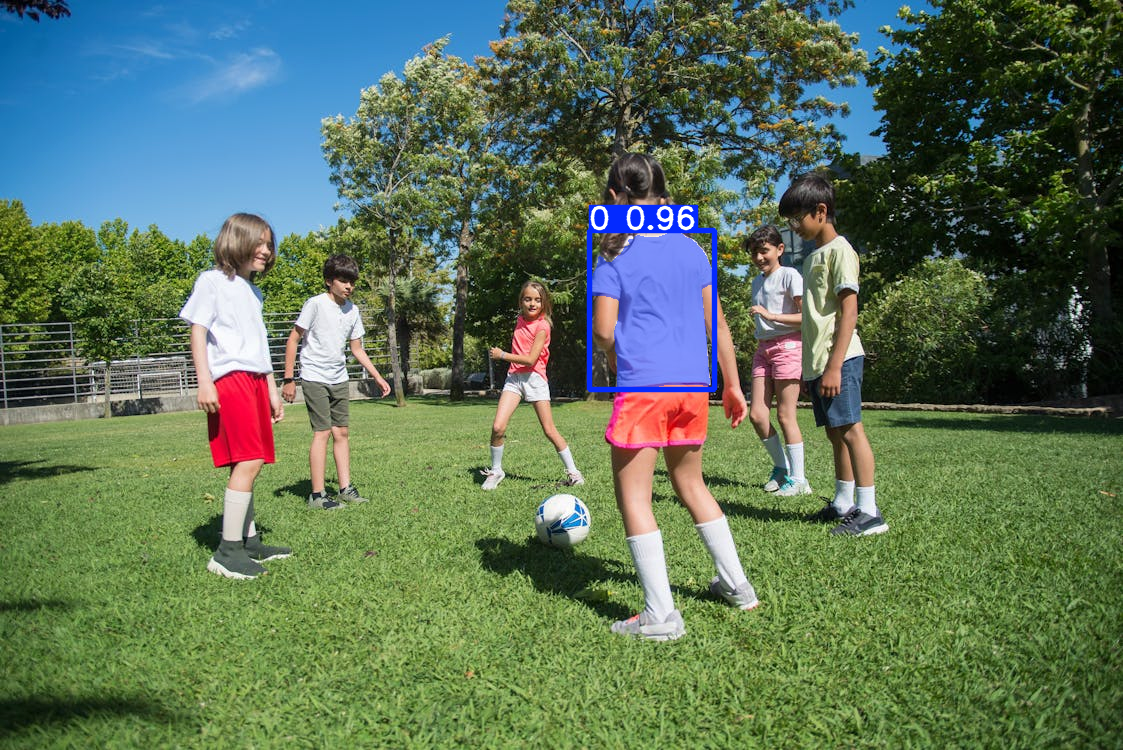

In [1]:
from ultralytics import SAM
from PIL import Image
import matplotlib.pyplot as plt

# Load the SAM model
model = SAM('sam_b.pt')

# Define the image path
image_path = ".././images/football_teamplay.jpeg"

# Load the image using PIL
image = Image.open(image_path)

# Specify multiple points for the same object and their labels
points = [[667, 362]]  # Coordinates of points
labels = [1]  # All points labeled as foreground (1)

# Group points and labels into a list for a single object
points_per_object = [points]
labels_per_object = [labels]

# Create a figure with a larger size
plt.figure(figsize=(10, 8))  # Width: 12 inches, Height: 8 inches

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes

# Overlay points on the image
for point in points:
    x, y = point
    plt.plot(x, y, 'bo', markersize=5)  # 'ro' means red color, circle marker

# Show the image with points
plt.show()

# Run inference with multiple points for the same object
results = model(image, points=points_per_object, labels=labels_per_object)

# Display the segmentation results
results[0].show()



# Single object : tree Point

In [4]:
from ultralytics import SAM
from PIL import Image
import matplotlib.pyplot as plt

# Load the SAM model
model = SAM('sam_b.pt')

# Define the image path (your uploaded image)
image_path =  ".././images/football_teamplay.jpeg"

# Load the image using PIL
image = Image.open(image_path)

# Define points and labels for single-object segmentation
single_object_points = [[667, 362], [640, 517], [678, 399]]  # 3 points


single_object_results = model(image, points=[single_object_points], labels=[single_object_labels])


# Visualize the results
# Display original image with points
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
for point in single_object_points:
    x, y = point
    plt.plot(x, y, 'bo', markersize=7)  # Single object points (red)


plt.title("Original Image with Points")
plt.show()

# Show single-object segmentation result
print("Single-Object Segmentation:")
single_object_results[0].show()

NameError: name 'single_object_labels' is not defined

# Multi objects : tree Point


0: 1024x1024 1 0, 1 1, 1 2, 220.4ms
Speed: 5.7ms preprocess, 220.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


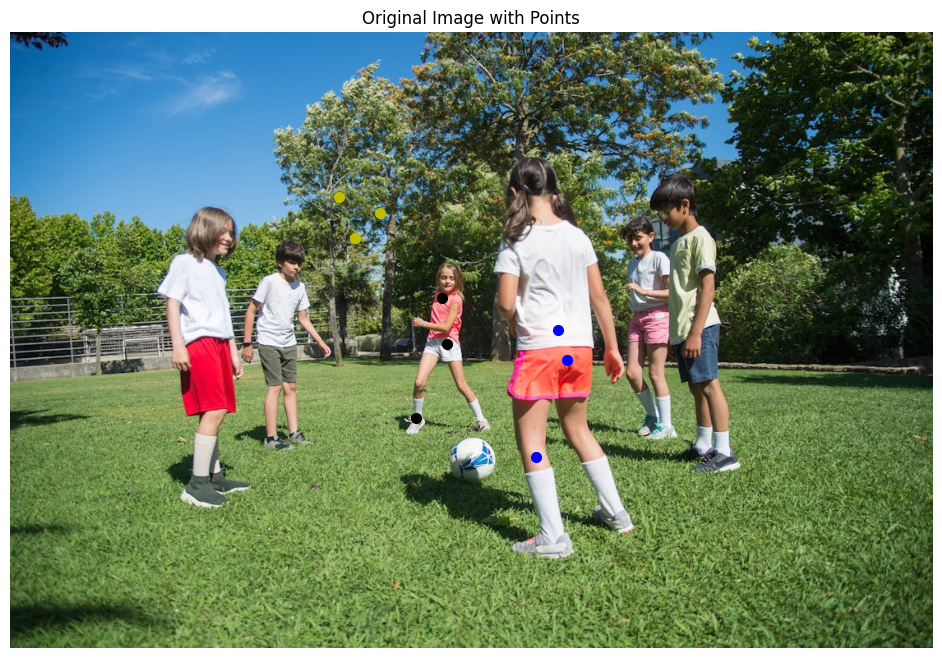

Multi-Object Segmentation:


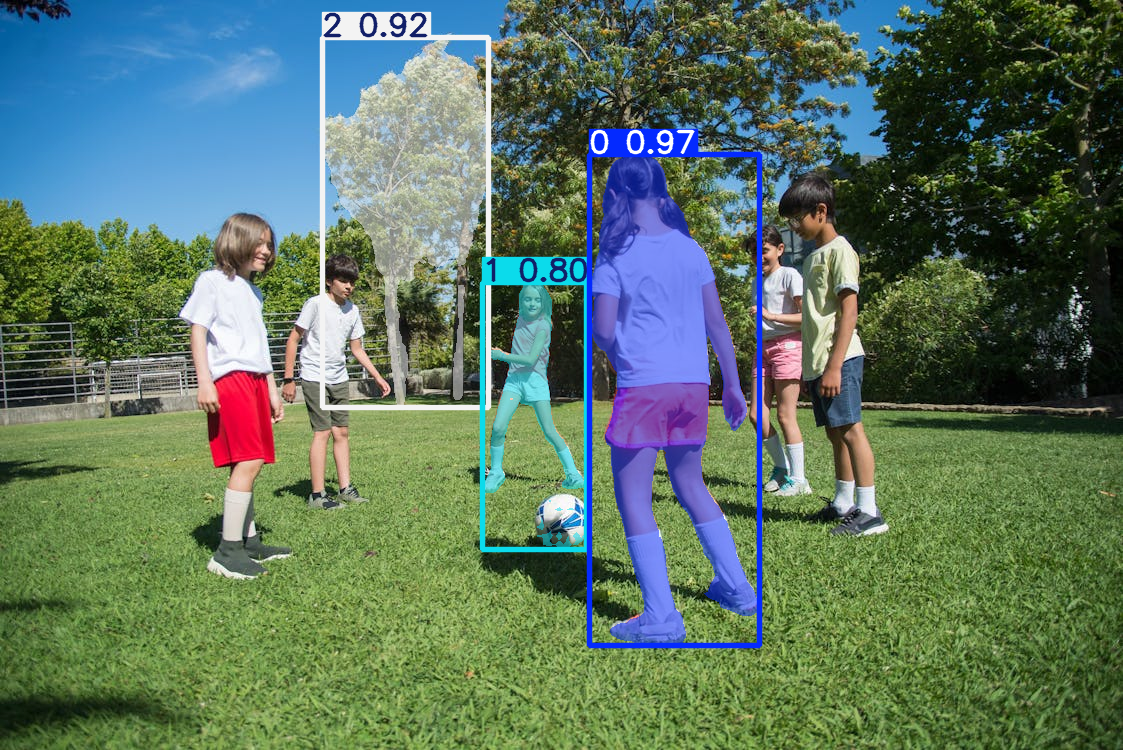

In [2]:
from ultralytics import SAM
from PIL import Image
import matplotlib.pyplot as plt

# Load the SAM model
model = SAM('sam_b.pt')

# Define the image path (your uploaded image)
image_path =  ".././images/football_teamplay.jpeg"

# Load the image using PIL
image = Image.open(image_path)

# Define points and labels for multi-object segmentation
multi_object_points = [
    [[667, 362], [640, 517], [678, 399]],  # Object 1
    [[526, 323], [531, 379], [494, 470]],  # Object 2
    [[400, 200], [420, 250], [450, 220]]   # Object 3
]
multi_object_labels = [
    [1, 1, 1],  # Labels for Object 1
    [1, 1, 1],  # Labels for Object 2
    [1, 1, 1]   # Labels for Object 3
]



# Run inference for multi-object segmentation
multi_object_results = model(image, points=multi_object_points, labels=multi_object_labels)

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')

# Overlay multi-object points with different colors
colors = ['bo', 'ko', 'yo']  # Blue, green, yellow
for obj_idx, points in enumerate(multi_object_points):
    for point in points:
        x, y = point
        plt.plot(x, y, colors[obj_idx], markersize=7)

plt.title("Original Image with Points")
plt.show()


# Show multi-object segmentation result
print("Multi-Object Segmentation:")
for result in multi_object_results:
    result.show()


In [ ]:
import cv2
from ultralytics import SAM
from IPython.display import display, Image, clear_output
from PIL import Image as PILImage
import numpy as np

# Load the SAM model
model = SAM('sam_b.pt')

# Open the video file
video_path = ".././Videos/video2.mp4"  # Replace with your video path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Cannot open video file")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Stream stopped.")
        break

    # Convert the frame to RGB format (as OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the frame to PIL Image format for SAM model
    frame_pil = PILImage.fromarray(frame_rgb)
    
    # Perform segmentation on the frame
    results = model.predict(frame_pil, device=0)

    # Get the segmentation mask as an array
    seg_mask = results[0].masks  # Assuming the first result is the mask
    if seg_mask is not None:
        seg_mask = seg_mask[0].data.cpu().numpy()  # Move tensor to CPU and convert to NumPy
        seg_mask = np.squeeze(seg_mask)  # Remove extra dimensions if present
    else:
        seg_mask = np.zeros((frame_rgb.shape[0], frame_rgb.shape[1]), dtype=np.uint8)

    # Ensure the mask has the same height and width as the frame
    if seg_mask.shape[:2] != frame_rgb.shape[:2]:
        seg_mask = cv2.resize(seg_mask, (frame_rgb.shape[1], frame_rgb.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Overlay the segmentation mask onto the original frame
    overlay = frame_rgb.copy()
    overlay[seg_mask > 0] = [255, 0, 0]  # Highlight segmentation in red

    # Convert the overlay frame back to BGR for display in OpenCV
    overlay_bgr = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)

    # Convert the overlay frame to JPEG format for display in Jupyter
    _, buffer = cv2.imencode('.jpg', overlay_bgr)
    img_bytes = buffer.tobytes()

    # Display the frame with segmentation overlay in Jupyter Notebook
    clear_output(wait=True)
    display(Image(data=img_bytes))
     # Clear previous frame for smoother playback

cap.release()
print("Video stream ended.")


In [ ]:
from ultralytics import SAM
model = SAM('sam_b.pt')
results = model.predict(".././Videos/video2.mp4", device = 0)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/337) /root/workspace/DL-FOR-COMPUTER-VISION/week08/../Videos/video2.mp4: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60

In [ ]:
# webcam
from ultralytics import SAM
model = SAM("sam_l.pt")
results = model.predict(0, device = 0, show = True)

# Generate Segmentation Dataset Using a Detection Model

https://github.com/ultralytics/ultralytics

In [7]:
from ultralytics.yolo.data.annotator import auto_annotate

auto_annotate(data="images", det_model="yolov8x.pt", sam_model='sam_b.pt')


Ultralytics YOLOv8.0.106 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
100%|██████████| 131M/131M [00:00<00:00, 220MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:381: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded

# Code for auto annotation

In [ ]:
import cv2
import numpy as np
from pathlib import Path

from ultralytics import YOLO
from ultralytics.vit.sam import PromptPredictor, build_sam
from ultralytics.yolo.utils.torch_utils import select_device

import matplotlib.pyplot as plt

def auto_annotate(data, det_model='yolov8x.pt', sam_model='sam_b.pt', device='', output_dir=None):
    """
    Automatically annotates images using a YOLO object detection model and a SAM segmentation model.
    Args:
        data (str): Path to a folder containing images to be annotated.
        det_model (str, optional): Pre-trained YOLO detection model. Defaults to 'yolov8x.pt'.
        sam_model (str, optional): Pre-trained SAM segmentation model. Defaults to 'sam_b.pt'.
        device (str, optional): Device to run the models on. Defaults to an empty string (CPU or GPU, if available).
        output_dir (str, None, optional): Directory to save the annotated results.
            Defaults to a 'labels' folder in the same directory as 'data'.
    """
    device = select_device(device)
    det_model = YOLO(det_model)
    sam_model = build_sam(sam_model)
    det_model.to(device)
    sam_model.to(device)

    if not output_dir:
        output_dir = Path(str(data)).parent / 'labels'
    Path(output_dir).mkdir(exist_ok=True, parents=True)

    prompt_predictor = PromptPredictor(sam_model)
    det_results = det_model(data, stream=True)

    for result in det_results:
        boxes = result.boxes.xyxy  # Boxes object for bbox outputs
        class_ids = result.boxes.cls.int().tolist()  # noqa
        if len(class_ids):
            prompt_predictor.set_image(result.orig_img)
            masks, _, _ = prompt_predictor.predict_torch(
                point_coords=None,
                point_labels=None,
                boxes=prompt_predictor.transform.apply_boxes_torch(boxes, result.orig_shape[:2]),
                multimask_output=False,
            )



            result.update(masks=masks.squeeze(1))
            segments = result.masks.xyn  # noqa



            with open(str(Path(output_dir) / Path(result.path).stem) + '.txt', 'w') as f:
                for i in range(len(segments)):
                    s = segments[i]
                    if len(s) == 0:
                        continue
                    segment = map(str, segments[i].reshape(-1).tolist())
                    f.write(f'{class_ids[i]} ' + ' '.join(segment) + '\n')
